# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [155]:
# Imports
# Packages for numerics + dataframes
import pandas as pd
import numpy as np

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
from datetime import datetime
from datetime import date
from datetime import timedelta

# Packages for OLS, MLR, confusion matrix
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [156]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") # index_col parameter specified to avoid "Unnamed: 0" column when reading in data from csv

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


Before constructing a multiple linear regression model, Exploratory Data Analysis (EDA) serves several purposes:

1- Identify Data Distribution and Relationships: EDA helps in understanding the distribution of variables and their relationships. It's crucial to know if the variables exhibit a linear or non-linear relationship with the dependent variable.

2- Detect Outliers and Extreme Values: Outliers can skew the model's assumptions and predictions. EDA allows for the detection of outliers and provides insights on whether they should be treated, removed, or kept in the analysis.

3- Handling Missing Data: EDA reveals the extent of missing data in variables. Decisions can be made on how to deal with missing values, whether by imputation using means, medians, or more complex methods, or by excluding certain observations.

4- Multicollinearity Assessment: EDA helps in identifying potential multicollinearity between predictor variables. High correlation between predictors can affect the stability and interpretability of the regression model.

5- Feature Engineering: EDA can inspire the creation of new features by transforming or combining existing ones. This can enhance the model's performance and provide better insights into relationships.

6- Checking Assumptions: EDA allows us to verify assumptions like linearity, constant variance (homoscedasticity), and normality of residuals. These assumptions are critical for the validity of regression results.

7- Data Transformation: If the variables do not meet assumptions, EDA can guide decisions on transformations such as log or power transformations to achieve linearity and normality.

8- Model Selection: Insights from EDA might lead to the selection of certain predictors over others, based on their relevance and impact on the dependent variable.

9- Visualization: EDA aids in visually presenting the data, which can be important for communicating results to stakeholders and making informed decisions.

In summary, EDA ensures that the data meets the assumptions of the linear regression model, helps in cleaning and preparing the data, guides variable selection and transformation, and provides a deeper understanding of relationships and potential challenges in the modeling process.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [157]:
# Start with `.shape` and `.info()`

print("Shape of the DataFrame:", df0.shape)
print("\nInformation about the DataFrame:")
print(df0.info())

Shape of the DataFrame: (22699, 18)

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-nul

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [158]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()

df0.isna().sum()
df0.duplicated().sum()

0

Use `.describe()`.

In [159]:
# Use .describe()

print("\nSummary Statistics:")
df0.describe()


Summary Statistics:


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [160]:
# Check for duplicates
print('Shape of dataframe:', df0.shape)
print('Shape of dataframe with duplicates dropped:', df0.drop_duplicates().shape)

# Check for missing values in dataframe
print('Total count of missing values:', df0.isna().sum().sum())

# Display missing values per column in dataframe
print('Missing values per column:')
df0.isna().sum()

Shape of dataframe: (22699, 18)
Shape of dataframe with duplicates dropped: (22699, 18)
Total count of missing values: 0
Missing values per column:


Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

Use `.describe()`.

In [161]:
# Use .describe()

df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [162]:
# Check the format of the data

print(df0.dtypes)

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object


In [163]:
# Convert datetime columns to datetime

df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

# Verify the changes
print(df0.dtypes)


Unnamed: 0                        int64
VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [164]:
# Create `duration` column

df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']).dt.total_seconds() / 60

# Verify the changes

print(df0[['duration', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']].head())

    duration tpep_pickup_datetime tpep_dropoff_datetime
0  14.066667  2017-03-25 08:55:43   2017-03-25 09:09:47
1  26.500000  2017-04-11 14:53:28   2017-04-11 15:19:58
2   7.200000  2017-12-15 07:26:56   2017-12-15 07:34:08
3  30.250000  2017-05-07 13:17:59   2017-05-07 13:48:14
4  16.716667  2017-04-15 23:32:20   2017-04-15 23:49:03


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [165]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

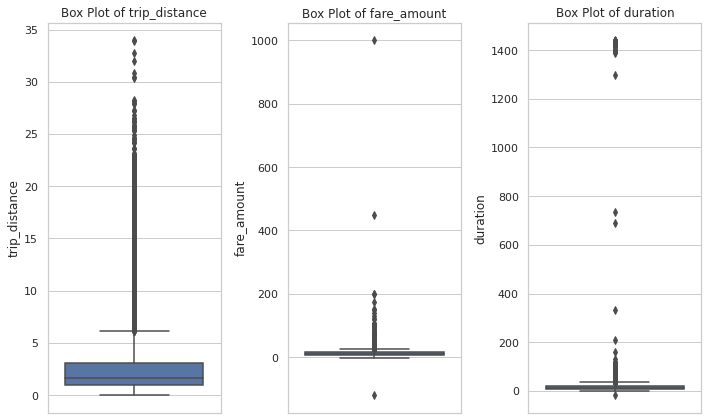

In [166]:
# Create box plots for selected features
plt.figure(figsize=(10, 6))

# Box plot for trip_distance
plt.subplot(1, 3, 1)
sns.boxplot(y='trip_distance', data=df0)
plt.title("Box Plot of trip_distance")

# Box plot for fare_amount
plt.subplot(1, 3, 2)
sns.boxplot(y='fare_amount', data=df0)
plt.title("Box Plot of fare_amount")

# Box plot for duration
plt.subplot(1, 3, 3)
sns.boxplot(y='duration', data=df0)
plt.title("Box Plot of duration")

plt.tight_layout()
plt.show()

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

1- All three variables, namely "trip_distance," "fare_amount," and "duration," contain outliers. While some of these outliers are extreme, others are less extreme.

2- The values in the "trip_distance" column vary, and while some might appear high, they could be justified. For instance, considering that the straight-line distance from the southern tip of Staten Island to the northern end of Manhattan is approximately 30 miles, the distribution of values in this column seems reasonable. However, it's essential to note that the values for "fare_amount" and "duration" exhibit more problematic outliers on the higher end.

3- It's unlikely that distances, fares, and durations of 0 or negative values make sense for "fare_amount" and "duration." However, a trip distance of 0 could have occurred due to short trips, possibly within the same pickup and dropoff locations, so it might be plausible. Yet, for the other two variables, such values seem implausible.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [167]:
# Are trip distances of 0 bad data or very short trips rounded down?

sorted(set(df0['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [168]:
sum(df0['trip_distance']==0)

148

#### `fare_amount` outliers

In [169]:
df0['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

The fare_amount column exhibits a wide range of values with extreme values that seem implausible.

Low values: Negative values are problematic and should be addressed. Values of zero could represent legitimate instances if the taxi logged a trip that was immediately canceled.

High values: The maximum fare amount in this dataset is nearly $1,000, which significantly deviates from typical taxi fare values. These high values might be due to erroneous data or exceptional circumstances, such as fare manipulation or incorrect fare recording. The threshold for identifying potential outliers using the Interquartile Range (IQR) suggests a value of approximately $62.50.

Impute values less than $0 with `0`.

In [170]:
# Impute values less than $0 with 0

df0.loc[df0['fare_amount']<0, 'fare_amount']=0
df0['fare_amount'].min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [171]:
def outlier_imputer(column_list, iqr_factor):
    for col in column_list:
        # Reassign negative values to zero
        df0.loc[df0[col] < 0, col] = 0
        
        # Calculate upper threshold
        q1 = df0[col].quantile(0.25)
        q3 = df0[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        
        # Reassign values > threshold to threshold
        df0.loc[df0[col] > upper_threshold, col] = upper_threshold
        
        # Print summary statistics after imputation
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)
        print(df0[col].describe())
        print()

# Call the function with the specified column and iqr_factor
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers


In [172]:
# Call .describe() for duration outliers

print(df0['duration'].describe())

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64


The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [173]:
# Impute a 0 for any negative values

df0.loc[df0['duration'] < 0, 'duration'] = 0
df0['duration'].min()

0.0

In [174]:
# Impute the high outliers
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [175]:
# Create `pickup_dropoff` column

df0['pickup_dropoff'] = df0['PULocationID'].astype(str)+ '' + df0['DOLocationID'].astype(str)
df0['pickup_dropoff'].head()

0    100231
1     18643
2    262236
3     18897
4      4112
Name: pickup_dropoff, dtype: object

Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [176]:
grouped = df0.groupby('pickup_dropoff')['trip_distance'].mean()
grouped[:5]

pickup_dropoff
1001      16.890000
100100     0.253333
100107     1.180000
100113     2.024000
100114     1.940000
Name: trip_distance, dtype: float64

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [177]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [178]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0['mean_distance'] = df0['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

# Confirm that it worked
print(df0['mean_distance'].head())

0    3.521667
1    3.108889
2    0.881429
3    3.700000
4    4.435000
Name: mean_distance, dtype: float64


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [179]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped_duration = df0.groupby('pickup_dropoff')['duration'].mean()
grouped_duration_dict = grouped_duration.to_dict()

# Create a mean_duration column that is a copy of the pickup_dropoff helper column
df0['mean_duration'] = df0['pickup_dropoff']

# Map `grouped_duration_dict` to the `mean_duration` column
df0['mean_duration'] = df0['mean_duration'].map(grouped_duration_dict)

# Confirm that it worked
print(df0['mean_duration'].head())

0    22.847222
1    24.470370
2     7.250000
3    30.250000
4    14.616667
Name: mean_duration, dtype: float64


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [180]:
# Create 'day' col
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()

# Confirm that it worked
print(df0[['day', 'month']].head())

        day     month
0  Saturday     March
1   Tuesday     April
2    Friday  December
3    Sunday       May
4  Saturday     April


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [181]:
# Create 'rush_hour' col
df0['rush_hour'] = df0['tpep_pickup_datetime'].dt.hour

In [182]:
# If day is Saturday or Sunday, impute 0 in `rush_hour` column
df0.loc[df0['day'].isin(['Saturday','Sunday']),'rush_hour'] = 0

def rush_hourizer(row):
    if 6 <= row['rush_hour'] < 10:
        return 1
    elif 16 <= row['rush_hour'] < 20:
        return 1
    else:
        return 0

In [183]:
# Apply the `rush_hourizer()` function to the new column
df0['rush_hour'] = df0.apply(rush_hourizer, axis=1)
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100231,3.521667,22.847222,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,18643,3.108889,24.470370,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262236,0.881429,7.250000,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,18897,3.700000,30.250000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4112,4.435000,14.616667,Saturday,April,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

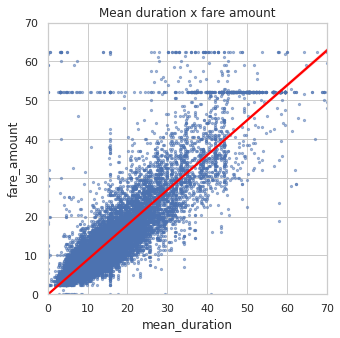

In [184]:
# Create a scatterplot to visualize the relationship between variables of interest

sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)
sns.regplot(x=df0['mean_duration'], y=df0['fare_amount'],
            scatter_kws={'alpha':0.5, 's':5},
            line_kws={'color':'red'})
plt.ylim(0, 70)
plt.xlim(0, 70)
plt.title('Mean duration x fare amount')
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [185]:
df0[df0['fare_amount'] > 50]['fare_amount'].value_counts().head()

52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64

Examine the first 30 of these trips.

In [186]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

# Now you can display the first 30 rows of the DataFrame
df0[df0['fare_amount'] > 50].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,36.800000,236132,19.211667,40.500000,Sunday,March,0
21,85505540,2,2017-10-11 12:34:49,2017-10-11 13:22:38,1,12.30,5,N,138,265,1,62.5,0.0,0.0,12.00,16.26,0.3,96.81,47.816667,138265,20.552000,39.376667,Wednesday,October,0
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,62.5,0.5,0.5,18.56,11.52,0.3,111.38,88.783333,13223,30.830000,88.783333,Monday,November,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,66.850000,132163,19.229000,52.941667,Saturday,June,0
156,104881101,1,2017-12-11 10:21:18,2017-12-11 11:14:57,1,15.60,1,N,138,88,1,51.5,0.0,0.5,11.60,5.76,0.3,69.66,53.650000,13888,15.393333,64.316667,Monday,December,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,0.966667,132132,2.255862,3.021839,Saturday,November,0
174,53109134,1,2017-06-22 14:22:05,2017-06-22 16:07:28,1,16.90,1,N,230,219,2,62.5,0.0,0.5,0.00,0.00,0.3,72.30,88.783333,230219,16.900000,88.783333,Thursday,June,0
176,50046493,2,2017-06-13 20:05:03,2017-06-13 20:42:53,1,18.05,3,N,163,1,2,62.5,0.5,0.0,0.00,10.50,0.3,80.80,37.833333,1631,18.050000,37.833333,Tuesday,June,0
220,95620783,2,2017-11-11 13:39:55,2017-11-11 14:53:05,1,13.61,1,N,132,181,1,55.0,0.0,0.5,11.16,0.00,0.3,66.96,73.166667,132181,17.358571,42.697619,Saturday,November,0
242,67332929,2,2017-08-09 08:32:09,2017-08-09 09:31:11,1,15.89,1,N,138,87,1,53.0,0.0,0.5,10.00,5.76,0.3,69.56,59.033333,13887,13.812500,44.284722,Wednesday,August,1


**Question:** What do you notice about the first 30 trips?

Upon examining the first 30 trips with a fare amount of $52, a clear pattern emerges. These trips predominantly involve either the pickup or dropoff location 132, and all of them are associated with a RatecodeID of 2.

Interestingly, there seems to be no consistent temporal or spatial pattern for these trips. They occur on various days, at different times, and with different vendors, spanning across different months. However, a significant observation is the presence of toll amounts around $5.54 for many of these trips. This suggests that location 132 is likely an area that frequently requires tolls, which might indicate an airport.

Further investigation indicates that RatecodeID 2 corresponds to trips for JFK (John F. Kennedy) International Airport. A quick search confirms that in 2017, there was indeed a flat fare of $52 for taxi trips between JFK Airport (located in Queens) and Manhattan.

Given this understanding and the knowledge from the data dictionary, it's reasonable to infer that these trips represent journeys between JFK Airport and Manhattan. This information could be utilized to ensure that the model predictions accurately account for these specific cases.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [187]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [188]:
df2 = df0.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

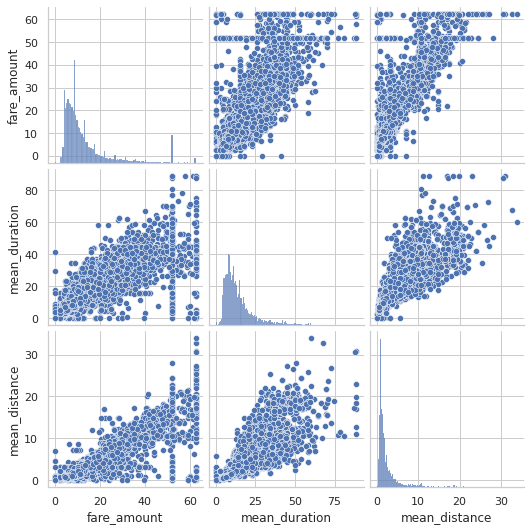

In [189]:
# Create a pairplot to visualize pairwise relationships between variables in the data

sns.set(style='whitegrid')
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']])
plt.show()

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [190]:
# Correlation matrix to help determine most correlated variables
correlation_matrix = df2.corr()

Visualize a correlation heatmap of the data.

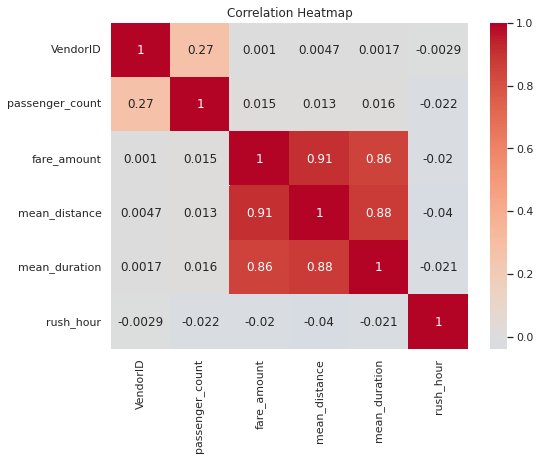

In [191]:
# Create correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

Both mean_duration and mean_distance are highly correlated with the target variable fare_amount. Additionally, these two predictor variables are also highly correlated with each other, having a Pearson correlation coefficient of 0.87.

It's important to note that highly correlated predictor variables can pose challenges in linear regression models when the goal is to draw statistical inferences about the data. However, in cases where the primary objective is accurate prediction rather than using the model for understanding the data, correlated predictors can still be used to create effective predictive models.

In this scenario, as the aim is to predict fare_amount, which will serve as a predictor variable in machine learning models, it's reasonable to proceed with both mean_duration and mean_distance as predictors, even though they exhibit high correlation.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [192]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [193]:
# Remove the target column from the features

X = df2.drop(columns='fare_amount')

# Set y variable

y = df2[['fare_amount']]

# Display first few rows

X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


### Task 8b. Pre-process data


Dummy encode categorical variables

In [194]:
# Convert VendorID to string

X['VendorID'] = X['VendorID'].astype(str) 

# Get dummies

X = pd.get_dummies(X, columns=['VendorID'], drop_first=True)  
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Normalize the data

Use `StandardScaler()` and `fit_transform()` to standardize the X variables. Assign the results to a variable called `X_scaled`.

In [207]:
# Standardize the X variables

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print('X scaled:', X_scaled)

X scaled: [[ 3.39065627  0.17132107  0.83272904 -0.64959666  0.8931955 ]
 [-0.4997803   0.05507697  0.99389468 -0.64959666 -1.11957573]
 [-0.4997803  -0.57220754 -0.71595046  1.53941679 -1.11957573]
 ...
 [-0.4997803  -0.62773796 -0.77958761 -0.64959666  0.8931955 ]
 [-0.4997803  -0.23537681  0.21739441 -0.64959666  0.8931955 ]
 [-0.4997803  -0.40449468 -0.50192102 -0.64959666 -1.11957573]]


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [208]:
# Create training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

Instantiate your model and fit it to the training data.

In [209]:
# Fit your model to the training data

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [212]:
# Evaluate the model performance on the training data

r_sq_train = model.score(X_train,y_train)
print('Coefficient of determination:', r_sq_train)
y_pred_train = model.predict(X_train)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8361923401316557
R^2: 0.8361923401316557
MAE: 2.2112363192000233
MSE: 18.297568522989366
RMSE: 4.277565723982434


### Test data

Calculate the same metrics on the test data.

In [213]:
# Evaluate the model performance on the testing data

r_sq_test = model.score(X_test, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = model.predict(X_test)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8665793131513894
R^2: 0.8665793131513894
MAE: 2.149921497879185
MSE: 14.50904523712583
RMSE: 3.809074065586784


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [214]:
# Create a `results` dataframe

results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.352814,1.647186
18134,28.0,16.312604,11.687396
4655,5.5,6.730090,-1.230090
7378,15.5,16.220369,-0.720369
13914,9.5,10.543186,-1.043186


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

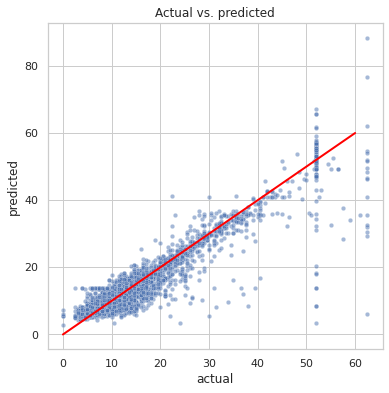

In [215]:
# Create a scatterplot to visualize `predicted` over `actual`

fig, ax = plt.subplots(figsize=(6, 6))
sns.set(style='whitegrid')
sns.scatterplot(x='actual',
                y='predicted',
                data=results,
                s=20,
                alpha=0.5,
                ax=ax
)
plt.plot([0,60], [0,60], c='red', linewidth=2)
plt.title('Actual vs. predicted');

Visualize the distribution of the `residuals` using a histogram.

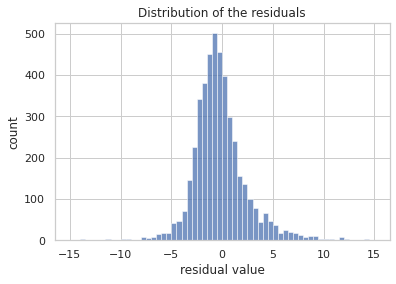

In [216]:
# Visualize the distribution of the `residuals`

sns.histplot(results['residual'], bins=np.arange(-15,15.5,0.5))
plt.title('Distribution of the residuals')
plt.xlabel('residual value')
plt.ylabel('count');

In [217]:
# Calculate residual mean

results['residual'].mean()

-0.012854099619567358

Create a scatterplot of `residuals` over `predicted`.

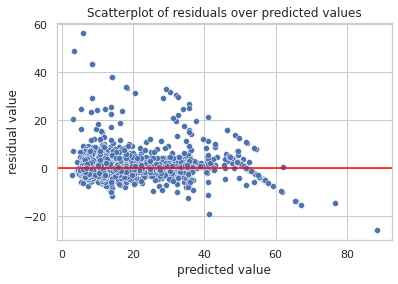

In [218]:
# Create a scatterplot of `residuals` over `predicted`

sns.scatterplot(x='predicted', y='residual', data=results)
plt.axhline(0, c='red')
plt.title('Scatterplot of residuals over predicted values')
plt.xlabel('predicted value')
plt.ylabel('residual value')
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [220]:
# Output the model's coefficients

coefficients = pd.DataFrame(model.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.03657,7.078437,2.80752,0.107441,-0.056425


The coefficients reveal that `mean_distance` was the feature with the greatest weight in the model's final prediction. For every mile traveled, the fare amount increases by a mean of \\$7. Note, however, that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



The main insights derived from this notebook are as follows:

Power of Multiple Linear Regression: The notebook showcases the utility of multiple linear regression in predicting a continuous dependent variable based on multiple independent variables.

Feature Selection: The notebook demonstrates the importance of exploratory data analysis in selecting both numeric and categorical features for the multiple linear regression model. Proper feature selection enhances the model's accuracy and interpretability.

Model Complexity: The process of fitting the multiple linear regression model highlights the iterative nature of model building. It's often necessary to fine-tune the selection of variables to achieve accurate predictions while adhering to model assumptions.

Linear Regression Assumptions: While not explicitly mentioned, the notebook hints at the importance of meeting linear regression assumptions, such as linearity, independence of errors, homoscedasticity, and normality of residuals.

Model Evaluation: The notebook's results can be extended to discuss the evaluation metrics used to assess the model's performance. The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) scores provide valuable insights into the model's predictive accuracy.

In summary, this notebook underscores the significance of thoughtful feature selection, understanding model assumptions, and employing proper evaluation metrics in building and assessing multiple linear regression models for predicting continuous outcomes.